In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
crops = pd.read_csv("/content/soil_measures.csv")

In [7]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [8]:
crops.shape

(2200, 5)

In [9]:
crops.crop.value_counts()

,count
crop,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [10]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [11]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [12]:
# Splitting the data
features = ["N", "P", "K", "ph"]

X_train, X_test, y_train, y_test = train_test_split(crops[features], crops.crop, test_size=0.2, random_state=42)

In [13]:
# Predict the crop using each feature
model_performance = {}
for feature in ['N', 'P', 'K', 'ph']:
    log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    model_performance[feature] = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {model_performance[feature]}")

F1-score for N: 0.1020973317588429
F1-score for P: 0.13310868837820025
F1-score for K: 0.24802511765923194
F1-score for ph: 0.0458225366614312


In [14]:
# Estimating feature correlation
correlations = crops[features].corr()
correlations

,N,P,K,ph
N,1.000000,-0.231460,-0.140512,0.096683
P,-0.231460,1.000000,0.736232,-0.138019
K,-0.140512,0.736232,1.000000,-0.169503
ph,0.096683,-0.138019,-0.169503,1.000000


<Axes: >

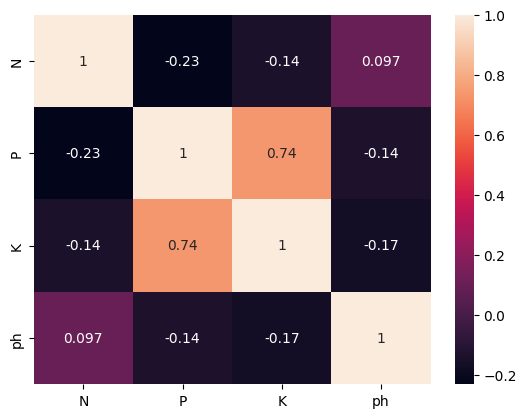

In [15]:
sns.heatmap(correlations, annot=True)

In [16]:
# Select the final features for the model
final_features = ['K', 'N', 'ph']

# Producing a final model
X_train, X_test, y_train, y_test = train_test_split(crops[final_features], crops["crop"], test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")
print(model_performance)

0.565077845525084


In [18]:
# 🌾 Define prediction function
def predict_crop(N, P, K, ph):
    """
    Predicts the crop based on soil nutrient values and pH.
    Args:
        N (float): Nitrogen value.
        P (float): Phosphorus value.
        K (float): Potassium value.
        ph (float): pH value.
    Returns:
        str: The predicted crop.
    """
    # Order of columns must match final_features
    input_data = pd.DataFrame([[K, N, ph]], columns=final_features)
    predicted_crop = log_reg.predict(input_data)
    return predicted_crop[0]

# 🧪 Test the prediction function
N_val = 90
P_val = 42
K_val = 37
pH_val = 6.5

predicted_crop = predict_crop(N_val, P_val, K_val, pH_val)
print(f"🌱 Predicted Crop: {predicted_crop}")

🌱 Predicted Crop: rice


In [19]:
# 🧪 Evaluate
from sklearn.metrics import accuracy_score

f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ Model Evaluation using all features:")
print(f"   • Accuracy       : {accuracy:.4f}")
print(f"   • Weighted F1-score: {f1:.4f}")


✅ Model Evaluation using all features:
   • Accuracy       : 0.5750
   • Weighted F1-score: 0.5651


In [52]:
# Initialize lists to store accuracy and model names
acc = []
model = []

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

# The previous cell already split the data, no need to split again here.
# Ensure this fitting and prediction block is not indented.
# Correcting variable names from Xtrain, Ytrain, Xtest, Ytest to X_train, y_train, X_test, y_test
DecisionTree.fit(X_train, y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
# Assuming acc and model are lists defined elsewhere in the notebook
# acc.append(x)
# model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  60.68181818181818
              precision    recall  f1-score   support

       apple       1.00      0.04      0.08        23
      banana       1.00      0.38      0.55        21
   blackgram       0.00      0.00      0.00        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.73      0.89      0.80        27
      coffee       0.75      0.88      0.81        17
      cotton       0.85      1.00      0.92        17
      grapes       0.39      1.00      0.56        14
        jute       0.62      0.87      0.73        23
 kidneybeans       0.67      1.00      0.80        20
      lentil       0.14      0.91      0.24        11
       maize       1.00      0.95      0.98        21
       mango       0.82      0.47      0.60        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       0.00      0.00      0.00        19
   muskmelon       0.33      1.00      0.50        17
      orange       1.00      1.00

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [28]:
f1_score

<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

**Guassian Naive Bayes**

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

NaiveBayes = GaussianNB()

# Correcting variable names from Xtrain, Ytrain to X_train, y_train
NaiveBayes.fit(X_train, y_train)

# Correcting variable names from Xtest to X_test
predicted_values = NaiveBayes.predict(X_test)
# Correcting variable names from Ytest to y_test
x = metrics.accuracy_score(y_test, predicted_values)
# acc and model are not defined, comment out these lines
# acc.append(x)
# model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

# Correcting variable names from Ytest to y_test
print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.6931818181818182
              precision    recall  f1-score   support

       apple       0.77      0.43      0.56        23
      banana       0.74      0.67      0.70        21
   blackgram       0.63      0.60      0.62        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.69      0.81      0.75        27
      coffee       0.76      0.94      0.84        17
      cotton       0.94      0.88      0.91        17
      grapes       0.46      0.79      0.58        14
        jute       0.58      0.78      0.67        23
 kidneybeans       0.62      1.00      0.77        20
      lentil       0.30      0.55      0.39        11
       maize       1.00      1.00      1.00        21
       mango       0.75      0.47      0.58        19
   mothbeans       0.89      0.33      0.48        24
    mungbean       0.45      0.53      0.49        19
   muskmelon       0.35      0.53      0.42        17
      orange       1.00      1.00 

In [33]:
# Cross validation score (NaiveBayes)
target = crops['crop'] # Define the target variable
# Pass the DataFrame with selected feature columns to cross_val_score
score = cross_val_score(NaiveBayes, crops[features], target, cv=5)
score

array([0.75681818, 0.80454545, 0.8       , 0.77272727, 0.78636364])

**Saving trained Guassian Naive Bayes model**

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

**Support Vector Machine (SVM)**



In [36]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

# Correcting variable names from Xtrain, Ytrain to X_train, y_train
SVM.fit(X_train,y_train)

# Correcting variable names from Xtest to X_test
predicted_values = SVM.predict(X_test)

# Correcting variable names from Ytest to y_test
x = metrics.accuracy_score(y_test, predicted_values)
# acc and model are not defined, comment out these lines
# acc.append(x)
# model.append('SVM')
print("SVM's Accuracy is: ", x)

# Correcting variable names from Ytest to y_test
print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.5409090909090909
              precision    recall  f1-score   support

       apple       0.73      0.48      0.58        23
      banana       0.41      0.33      0.37        21
   blackgram       0.62      0.50      0.56        20
    chickpea       1.00      0.81      0.89        26
     coconut       0.58      0.41      0.48        27
      coffee       0.80      0.94      0.86        17
      cotton       1.00      0.94      0.97        17
      grapes       0.45      0.71      0.56        14
        jute       0.44      0.35      0.39        23
 kidneybeans       0.33      0.45      0.38        20
      lentil       0.00      0.00      0.00        11
       maize       1.00      0.95      0.98        21
       mango       0.31      0.47      0.38        19
   mothbeans       0.27      0.25      0.26        24
    mungbean       0.33      0.37      0.35        19
   muskmelon       0.37      0.41      0.39        17
      orange       0.93      0.93      0.9

In [38]:
# Cross validation score (SVM)
score = cross_val_score(SVM,crops[features],target,cv=5)
score

array([0.44772727, 0.52727273, 0.5       , 0.55681818, 0.54772727])

**Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report # Import necessary metrics

LogReg = LogisticRegression(random_state=2)

# Correcting variable names from Xtrain, Ytrain to X_train, y_train
LogReg.fit(X_train, y_train)

# Correcting variable names from Xtest to X_test
predicted_values = LogReg.predict(X_test)

# Correcting variable names from Ytest to y_test
x = accuracy_score(y_test, predicted_values)
# acc and model are not defined, comment out these lines
# acc.append(x)
# model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

# Correcting variable names from Ytest to y_test
print(classification_report(y_test, predicted_values))

Logistic Regression's Accuracy is:  0.45227272727272727
              precision    recall  f1-score   support

       apple       0.60      0.26      0.36        23
      banana       0.73      0.52      0.61        21
   blackgram       0.39      0.60      0.47        20
    chickpea       0.87      1.00      0.93        26
     coconut       0.18      0.11      0.14        27
      coffee       0.57      0.76      0.65        17
      cotton       0.72      0.76      0.74        17
      grapes       0.37      0.71      0.49        14
        jute       0.43      0.57      0.49        23
 kidneybeans       0.15      0.25      0.19        20
      lentil       0.20      0.73      0.31        11
       maize       0.64      0.43      0.51        21
       mango       0.24      0.21      0.22        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       0.00      0.00      0.00        19
   muskmelon       0.41      0.65      0.50        17
      orange       0.86  

In [42]:
# Cross validation score (Logistic Regression)
# Pass the DataFrame with selected feature columns to cross_val_score
score = cross_val_score(LogReg, crops[features], target, cv=5)
score

array([0.57727273, 0.59545455, 0.59545455, 0.61363636, 0.59090909])

**Saving trained Logistic Regression model**

In [43]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

**RANDOM FOREST**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

RF = RandomForestClassifier(n_estimators=20, random_state=0)
# Corrected variable names from Xtrain, Ytrain to X_train, y_train
RF.fit(X_train, y_train)

# Corrected variable names from Xtest to X_test
predicted_values = RF.predict(X_test)

# Corrected variable names from Ytest to y_test
x = metrics.accuracy_score(y_test, predicted_values)
# acc and model are not defined, comment out these lines
# acc.append(x)
# model.append('RF')
print("RF's Accuracy is: ", x)

# Corrected variable names from Ytest to y_test
print(classification_report(y_test, predicted_values))

RF's Accuracy is:  0.6772727272727272
              precision    recall  f1-score   support

       apple       0.65      0.57      0.60        23
      banana       0.71      0.48      0.57        21
   blackgram       0.70      0.70      0.70        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.66      0.78      0.71        27
      coffee       0.71      0.88      0.79        17
      cotton       0.89      1.00      0.94        17
      grapes       0.41      0.50      0.45        14
        jute       0.61      0.61      0.61        23
 kidneybeans       0.67      0.80      0.73        20
      lentil       0.22      0.36      0.28        11
       maize       1.00      0.95      0.98        21
       mango       0.53      0.42      0.47        19
   mothbeans       0.65      0.54      0.59        24
    mungbean       0.44      0.37      0.40        19
   muskmelon       0.36      0.47      0.41        17
      orange       0.93      1.00      0.97

In [47]:
# Cross validation score (Random Forest)
# Pass the DataFrame with the selected feature columns to cross_val_score
score = cross_val_score(RF, crops[features], target, cv=5)
score

array([0.77045455, 0.81818182, 0.79090909, 0.80227273, 0.79090909])

**Saving trained Random Forest model**

In [48]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

**Accuracy Comparison**

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

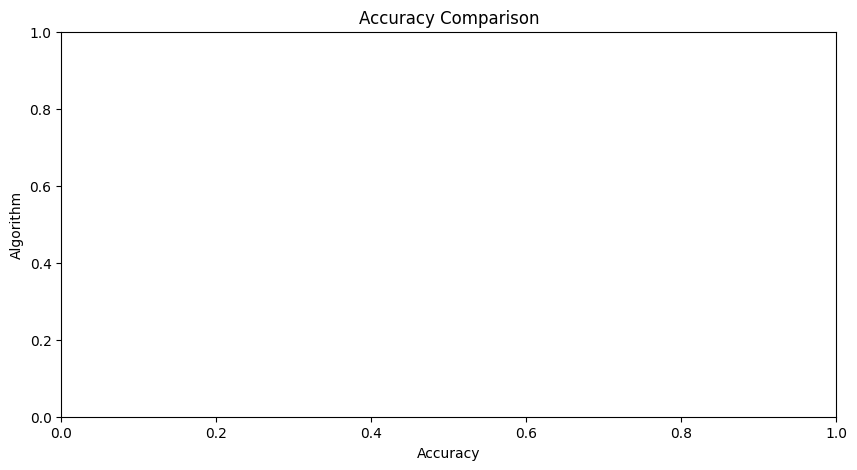

In [53]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [54]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

**Making a prediction**

In [57]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

# Making a prediction
# The trained RF model expects 3 features: K, N, ph in that order.
# Update the data array to match this.
# Assuming the input values 104, 18, 30 correspond to K, N, ph respectively
data = np.array([[30, 104, 6.7]]) # Using K=30, N=104, ph=6.7 based on the original data values
prediction = RF.predict(data)
print(prediction)

['coffee']
